# Advanced Lane Finding Project - [./P2_01_01_Distortion_Correction.ipynb](./P2_01_01_Distortion_Correction.ipynb)

### Camera Calibration

Compute the camera matrix and distortion coefficients.

Output images appear in the [./output_images](./output_images) folder.

In [1]:
# Camera Calibration
# Compute the camera matrix and distortion coefficients.

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path        # Draw polyline for transform points
import matplotlib.patches as patches    # Draw polyline for transform points
import os
from os import path
import scipy.misc          # Easily save thresholded images from 64-bit matrices

%matplotlib qt
%matplotlib inline



# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = sorted(glob.glob('./camera_cal/calibration*.jpg'))

# Step through the list of provided calibration images and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners (9 x 6)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    # If found, add object points, image points
    if ret == True:
        
        # Save image and show original image in left subplot
        outfname = fname.replace("camera_cal", "output_images") 
        outfname = outfname.replace(".jpg", ".png")
        cv2.imwrite(outfname, img)
        
        # Convert color for inline matplotlib display
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
#         fig, ax = plt.subplots(1, 2, figsize=(16,5))
#         fig.tight_layout()
#         ax[0].set_title(fname + ' || Original Chessboard Image')
#         ax[0].imshow(img)
        
        # Object & Image points
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cc_img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        
        # Show image in external window
        # cv2.imshow('img',img)
        # cv2.waitKey(500)
        
        # Save image and show in right subplot with identified corners
        outfname = fname.replace("camera_cal", "output_images") 
        outfname = outfname.replace(".jpg", "_corners.png")
        cv2.imwrite(outfname, cc_img)
        
        # Convert color for inline matplotlib display
        cc_img = cv2.cvtColor(cc_img, cv2.COLOR_BGR2RGB)
        
#         ax[1].set_title(outfname + ' || Chessboard Image with Identified Corners')
#         ax[1].imshow(cc_img)
        
#         # Save plot as image
#         outfname = outfname.replace("_corners.png", "_corners_plot.png") 
#         plt.savefig(outfname, bbox_inches='tight')
                
cv2.destroyAllWindows()


#### Calibration and Image Undistortion

Undistort the chessboard images using the object points and image points from the previous cell.

Output images appear in the [./output_images](./output_images) folder.

In [2]:
# Take an image, object points, and image points,
# perform camera calibration, image distortion correction, and 
# return the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    return undist



# Apply identified corners to undistort images
for fname in images:
    img = cv2.imread(fname)

    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    # Show image in external window
    # cv2.imshow('undistorted_img',undistorted_img)
    # cv2.waitKey(500)
    
    # Save undistorted image
    outfname = fname.replace("camera_cal", "output_images")
    outfname = outfname.replace(".jpg", "_undistorted.png") 
    cv2.imwrite(outfname, undistorted_img)
    
    # Convert color for inline matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    
#     # Show original and final output images
#     fig, ax = plt.subplots(1, 2, figsize=(16,5))
#     fig.tight_layout()
#     ax[0].set_title(fname + ' || Original Image')
#     ax[0].imshow(img)
#     ax[1].set_title(outfname + ' || Undistorted Image')
#     ax[1].imshow(undistorted_img)

#     # Save plot as image
#     outfname = outfname.replace("_undistorted.png", "_undistorted_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
        
cv2.destroyAllWindows()

### Pipeline - Single (Still) Images

1. Provide an example of a distortion-corrected image.

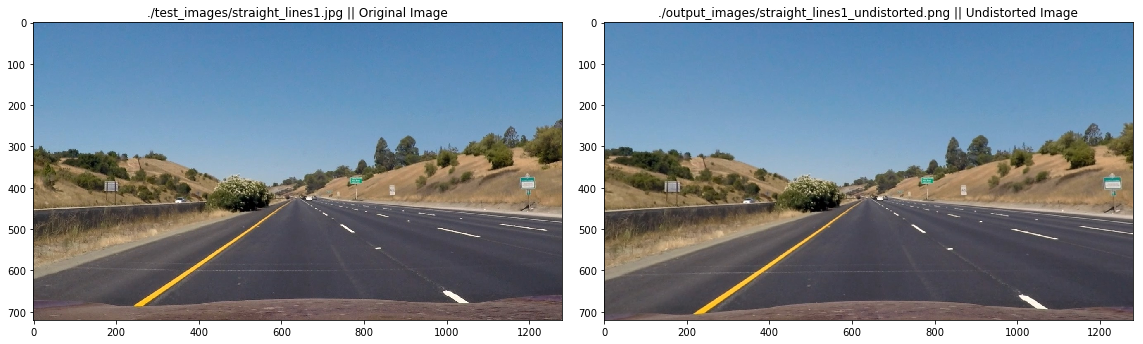

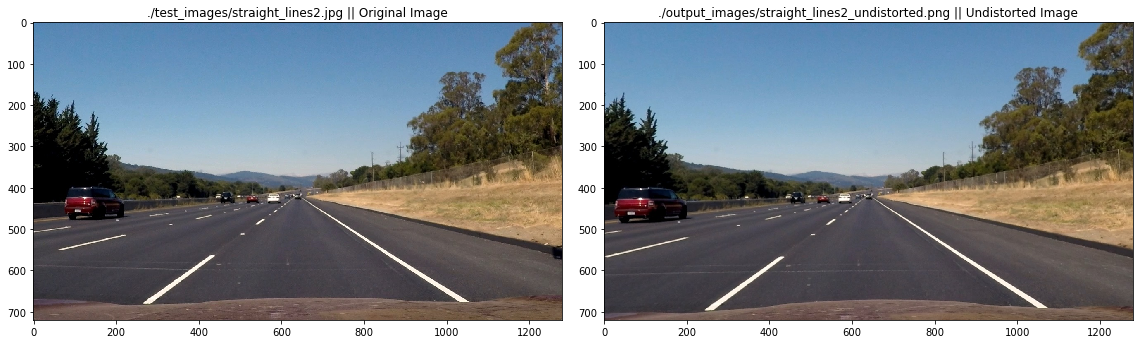

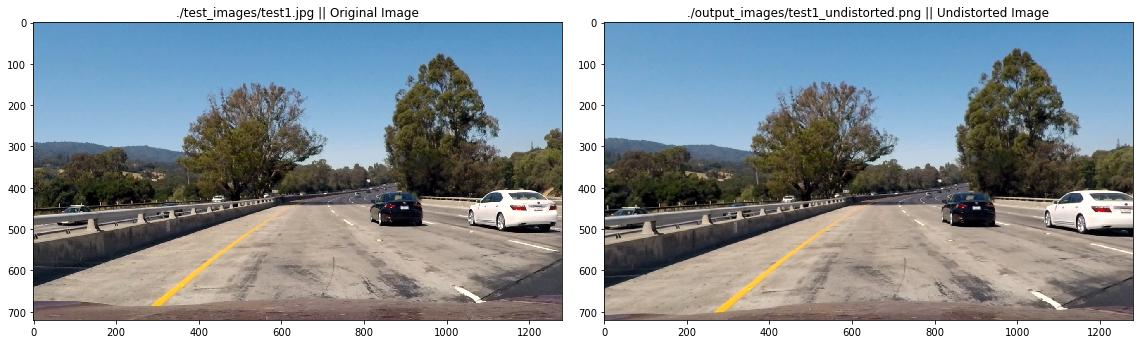

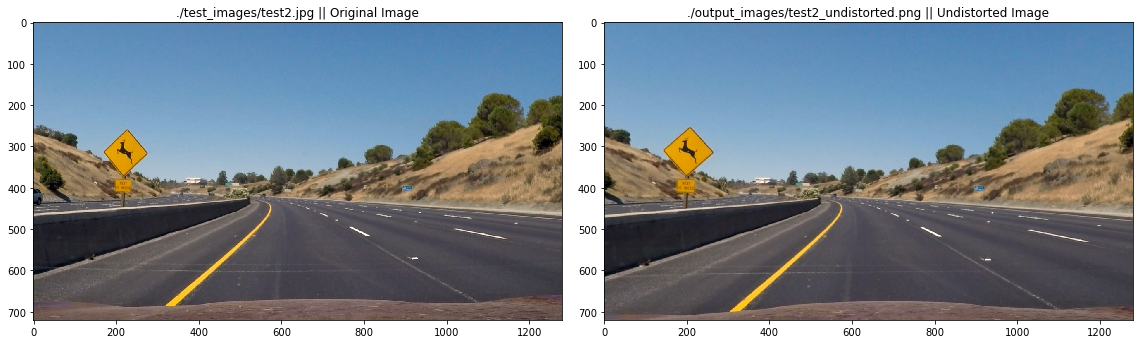

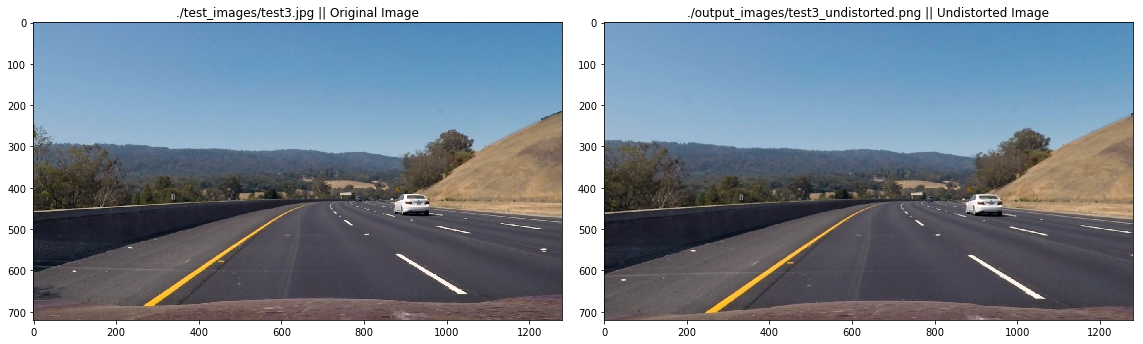

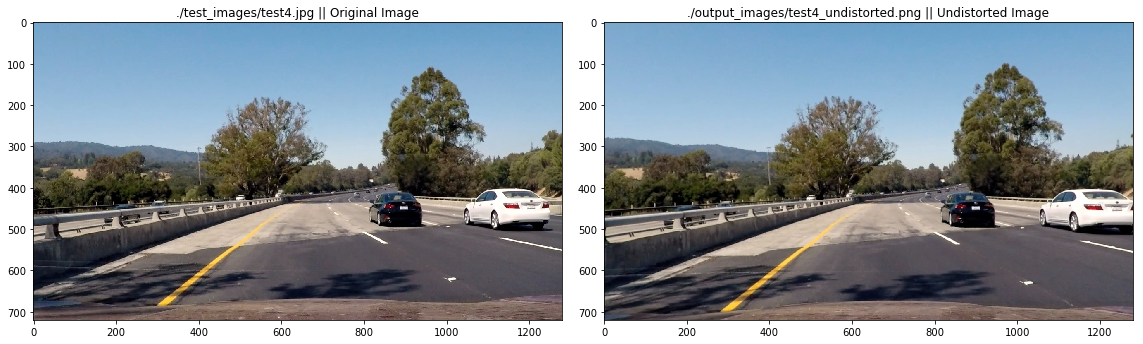

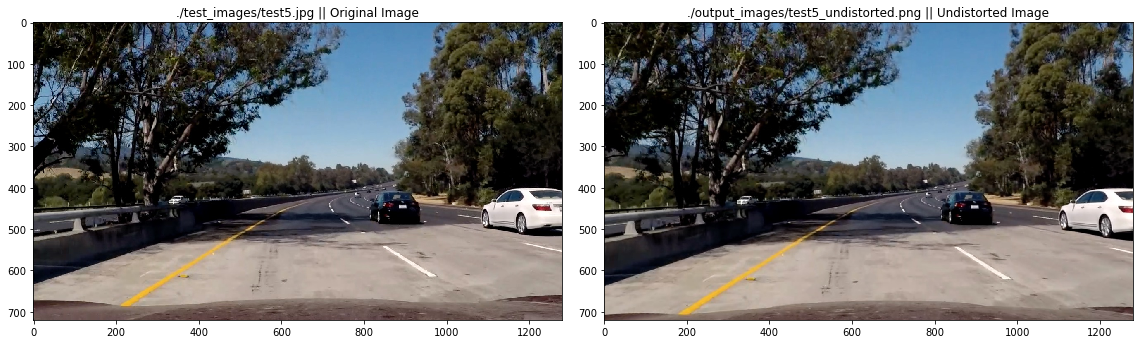

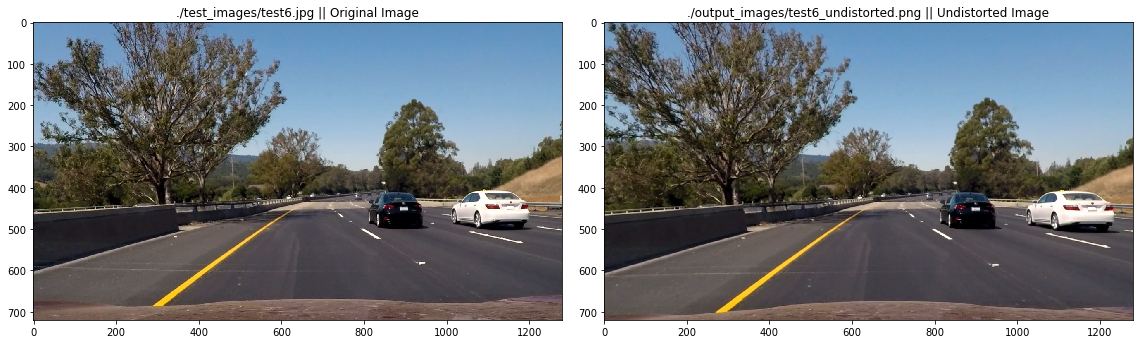

In [3]:
# Pipeline - Single (Still) Images
# 1. Provide an example of a distortion-corrected image.

# Make a list of calibration images
images = sorted(glob.glob('./test_images/*.jpg'))

# Apply identified corners to undistort images
for fname in images:
    img = cv2.imread(fname)

    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    # Show image in external window
    # cv2.imshow('undistorted_img',undistorted_img)
    # cv2.waitKey(500)
    
    # Save undistorted image
    outfname = fname.replace("test_images", "output_images")
    outfname = outfname.replace(".jpg", "_undistorted.png") 
    cv2.imwrite(outfname, undistorted_img)

    # Convert color for inline matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    
    # Show original and final output images
    fig, ax = plt.subplots(1, 2, figsize=(16,5))
    fig.tight_layout()
    ax[0].set_title(fname + ' || Original Image')
    ax[0].imshow(img)
    ax[1].set_title(outfname + ' || Undistorted Image')
    ax[1].imshow(undistorted_img)

    # Save plot as image
    outfname = outfname.replace("_undistorted.png", "_undistorted_plot.png") 
    plt.savefig(outfname, bbox_inches='tight')
        
cv2.destroyAllWindows()

# This is the end of [./P2_01_01_Distortion_Correction.ipynb](./P2_01_01_Distortion_Correction.ipynb)

All output videos can be found in the [./output_videos/](./output_videos/) folder.

All output images can be found in the [./output_images/](./output_images/) folder.